In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('reliance_stock_data.csv')

In [6]:
df.head()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
3100,2017-08-03,1485.8485,1517.8463,1473.9975,1505.5851,727.1667,769629,0.0,1.0
3101,2017-08-04,1513.7897,1516.2055,1472.7668,1479.1025,714.3762,574520,0.0,1.0
3102,2017-08-07,1485.5750,1487.7630,1470.2598,1473.7239,711.7785,409385,0.0,1.0
3103,2017-08-08,1476.8235,1477.7352,1447.8795,1461.6906,705.9666,418121,0.0,1.0
3104,2017-08-09,1458.5911,1476.7323,1445.6006,1457.5427,703.9633,390796,0.0,1.0


In [7]:
df.tail()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
4429,2022-12-26,2291.5385,2317.3829,2273.5340,2301.3840,2293.2827,95382,0.0,1.0
4430,2022-12-27,2305.4863,2323.5363,2292.1310,2320.1178,2311.9506,184837,0.0,1.0
4431,2022-12-28,2311.7764,2324.5391,2298.4212,2319.5708,2311.4055,168925,0.0,1.0
4432,2022-12-29,2308.2667,2323.7187,2303.2072,2317.8387,2309.6795,157229,0.0,1.0
4433,2022-12-30,2321.8954,2349.1529,2317.8387,2322.9894,2314.8121,77470,0.0,1.0


In [5]:
df = df[3100:]

In [59]:
df1=df.reset_index()['high']

In [60]:
df1

0       1517.8463
1       1516.2055
2       1487.7630
3       1477.7352
4       1476.7323
          ...    
1329    2317.3829
1330    2323.5363
1331    2324.5391
1332    2323.7187
1333    2349.1529
Name: high, Length: 1334, dtype: float64

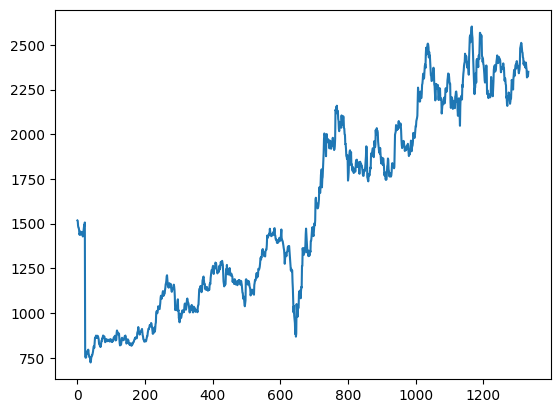

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [11]:
import numpy as np


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [62]:
df1

array([[0.42275022],
       [0.42187713],
       [0.40674254],
       ...,
       [0.85200098],
       [0.85156443],
       [0.86509827]])

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size


(867, 467)

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)


(766, 100)
(766,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)


(366, 100)
(366,)


(None, None)

In [20]:
X_test

array([[0.5774679 , 0.61542572, 0.62284751, ..., 0.65947133, 0.65804032,
        0.64722296],
       [0.61542572, 0.62284751, 0.61462532, ..., 0.65804032, 0.64722296,
        0.64142619],
       [0.62284751, 0.61462532, 0.62357512, ..., 0.64722296, 0.64142619,
        0.62949316],
       ...,
       [0.83604172, 0.86999758, 0.87945672, ..., 0.87952946, 0.87133159,
        0.84819308],
       [0.86999758, 0.87945672, 0.88115453, ..., 0.87133159, 0.84819308,
        0.85146738],
       [0.87945672, 0.88115453, 0.88486543, ..., 0.84819308, 0.85146738,
        0.85200098]])

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
X_test[0]

array([[0.5774679 ],
       [0.61542572],
       [0.62284751],
       [0.61462532],
       [0.62357512],
       [0.63133645],
       [0.63749702],
       [0.63616302],
       [0.6287655 ],
       [0.61101143],
       [0.6247878 ],
       [0.65910747],
       [0.64996366],
       [0.64077132],
       [0.64831438],
       [0.69197192],
       [0.67724961],
       [0.68833376],
       [0.69730783],
       [0.68940097],
       [0.6899103 ],
       [0.68469566],
       [0.65743398],
       [0.64627703],
       [0.63558094],
       [0.62648561],
       [0.63133645],
       [0.62163477],
       [0.63856418],
       [0.62432699],
       [0.6131701 ],
       [0.59250554],
       [0.60878007],
       [0.6094592 ],
       [0.599806  ],
       [0.59738058],
       [0.58767891],
       [0.60761586],
       [0.59551303],
       [0.5885521 ],
       [0.56888195],
       [0.55622126],
       [0.56616547],
       [0.56075677],
       [0.54479756],
       [0.54639831],
       [0.54375462],
       [0.545

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step - loss: 0.0654 - val_loss: 0.0595
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - loss: 0.0071 - val_loss: 0.0027
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - loss: 0.0017 - val_loss: 0.0044
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 316ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

In [28]:
model.save("stock_prediction_model.h5")
np.save("scaler_parameters.npy", scaler)

In [29]:
import tensorflow as tf


In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1345.815806396145

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2288.3518100031906

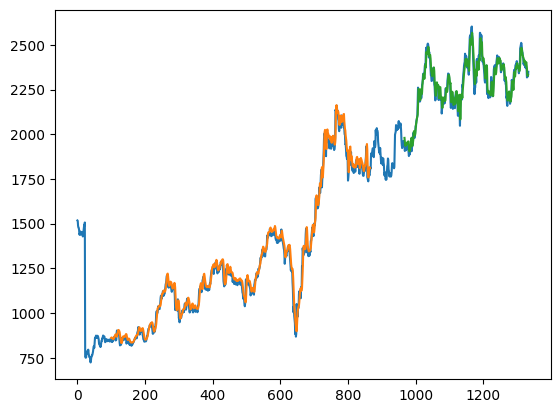

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [35]:
len(test_data)


467

In [38]:
x_input=test_data[367:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.8848654259983333,
 0.865631819179044,
 0.8682997745495498,
 0.8714285919528837,
 0.8835799503039501,
 0.8961921174766638,
 0.903759385853584,
 0.9139461874269108,
 0.9095318943291939,
 0.905893792718933,
 0.8911230075938206,
 0.9015280282176759,
 0.9095318943291939,
 0.9065243984170097,
 0.8995392071417063,
 0.9021586339157526,
 0.8985932719890013,
 0.879189921504463,
 0.8636915266995342,
 0.8670870917498563,
 0.8789716492427542,
 0.8736357385017421,
 0.8748484213014356,
 0.8796265192390607,
 0.881833612576739,
 0.8901528081428853,
 0.8809119949334441,
 0.8774193726902022,
 0.8537957902826061,
 0.8384186637576467,
 0.8458403995563675,
 0.8442881762149961,
 0.8290807933552855,
 0.8253941631485648,
 0.7878486735756418,
 0.791777840342301,
 0.7688091279310114,
 0.7636430140664285,
 0.7798448074641235,
 0.7875091330339636,
 0.787969941855611,
 0.8035411295552295,
 0.8005821090283249,
 0.7878729378738716,
 0.785107978521626,
 0.7699733353454252,
 0.7764734535008513,
 0.7870725352993655,


In [41]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8655816]
101
1 day input [0.86563182 0.86829977 0.87142859 0.88357995 0.89619212 0.90375939
 0.91394619 0.90953189 0.90589379 0.89112301 0.90152803 0.90953189
 0.9065244  0.89953921 0.90215863 0.89859327 0.87918992 0.86369153
 0.86708709 0.87897165 0.87363574 0.87484842 0.87962652 0.88183361
 0.89015281 0.88091199 0.87741937 0.85379579 0.83841866 0.8458404
 0.84428818 0.82908079 0.82539416 0.78784867 0.79177784 0.76880913
 0.76364301 0.77984481 0.78750913 0.78796994 0.80354113 0.80058211
 0.78787294 0.78510798 0.76997334 0.77647345 0.78707254 0.78595686
 0.80984724 0.84089256 0.83701192 0.83579918 0.82689791 0.81227266
 0.84428818 0.85714288 0.87070098 0.85217077 0.85690034 0.87399954
 0.881106   0.88673298 0.87482416 0.89328163 0.89699247 0.88976474
 0.88360416 0.88260975 0.88059667 0.87111326 0.86078098 0.86611695
 0.872423   0.88801845 0.93528983 0.93960707 0.94596171 0.95134609
 0.94792626 0.93448948 0.9233568  0.92207132 0.90807667 0.90569973
 0.88746059 0.89240843 0.89546445 0

8 day output [[0.8591667]]
9 day input [0.90589379 0.89112301 0.90152803 0.90953189 0.9065244  0.89953921
 0.90215863 0.89859327 0.87918992 0.86369153 0.86708709 0.87897165
 0.87363574 0.87484842 0.87962652 0.88183361 0.89015281 0.88091199
 0.87741937 0.85379579 0.83841866 0.8458404  0.84428818 0.82908079
 0.82539416 0.78784867 0.79177784 0.76880913 0.76364301 0.77984481
 0.78750913 0.78796994 0.80354113 0.80058211 0.78787294 0.78510798
 0.76997334 0.77647345 0.78707254 0.78595686 0.80984724 0.84089256
 0.83701192 0.83579918 0.82689791 0.81227266 0.84428818 0.85714288
 0.87070098 0.85217077 0.85690034 0.87399954 0.881106   0.88673298
 0.87482416 0.89328163 0.89699247 0.88976474 0.88360416 0.88260975
 0.88059667 0.87111326 0.86078098 0.86611695 0.872423   0.88801845
 0.93528983 0.93960707 0.94596171 0.95134609 0.94792626 0.93448948
 0.9233568  0.92207132 0.90807667 0.90569973 0.88746059 0.89240843
 0.89546445 0.88353142 0.88552024 0.87788018 0.88891586 0.89260249
 0.87952946 0.87133159 

16 day output [[0.85898453]]
17 day input [0.87918992 0.86369153 0.86708709 0.87897165 0.87363574 0.87484842
 0.87962652 0.88183361 0.89015281 0.88091199 0.87741937 0.85379579
 0.83841866 0.8458404  0.84428818 0.82908079 0.82539416 0.78784867
 0.79177784 0.76880913 0.76364301 0.77984481 0.78750913 0.78796994
 0.80354113 0.80058211 0.78787294 0.78510798 0.76997334 0.77647345
 0.78707254 0.78595686 0.80984724 0.84089256 0.83701192 0.83579918
 0.82689791 0.81227266 0.84428818 0.85714288 0.87070098 0.85217077
 0.85690034 0.87399954 0.881106   0.88673298 0.87482416 0.89328163
 0.89699247 0.88976474 0.88360416 0.88260975 0.88059667 0.87111326
 0.86078098 0.86611695 0.872423   0.88801845 0.93528983 0.93960707
 0.94596171 0.95134609 0.94792626 0.93448948 0.9233568  0.92207132
 0.90807667 0.90569973 0.88746059 0.89240843 0.89546445 0.88353142
 0.88552024 0.87788018 0.88891586 0.89260249 0.87952946 0.87133159
 0.84819308 0.85146738 0.85200098 0.85156443 0.86509827 0.86558157
 0.86886758 0.869343

24 day output [[0.85818803]]
25 day input [0.89015281 0.88091199 0.87741937 0.85379579 0.83841866 0.8458404
 0.84428818 0.82908079 0.82539416 0.78784867 0.79177784 0.76880913
 0.76364301 0.77984481 0.78750913 0.78796994 0.80354113 0.80058211
 0.78787294 0.78510798 0.76997334 0.77647345 0.78707254 0.78595686
 0.80984724 0.84089256 0.83701192 0.83579918 0.82689791 0.81227266
 0.84428818 0.85714288 0.87070098 0.85217077 0.85690034 0.87399954
 0.881106   0.88673298 0.87482416 0.89328163 0.89699247 0.88976474
 0.88360416 0.88260975 0.88059667 0.87111326 0.86078098 0.86611695
 0.872423   0.88801845 0.93528983 0.93960707 0.94596171 0.95134609
 0.94792626 0.93448948 0.9233568  0.92207132 0.90807667 0.90569973
 0.88746059 0.89240843 0.89546445 0.88353142 0.88552024 0.87788018
 0.88891586 0.89260249 0.87952946 0.87133159 0.84819308 0.85146738
 0.85200098 0.85156443 0.86509827 0.86558157 0.86886758 0.86934394
 0.86836606 0.86646616 0.86419058 0.86203247 0.86031306 0.85916668
 0.85857487 0.8584187

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt


In [46]:
len(df1)


1334

In [44]:
scaler.inverse_transform(lst_output)


array([[2350.06117037],
       [2356.23657194],
       [2357.13179794],
       [2355.2940755 ],
       [2351.72358892],
       [2347.44707012],
       [2343.39133341],
       [2340.16002906],
       [2338.00563946],
       [2336.89343989],
       [2336.5999599 ],
       [2336.81827765],
       [2337.24550387],
       [2337.64439023],
       [2337.86998897],
       [2337.86909285],
       [2337.66332081],
       [2337.31965798],
       [2336.92144371],
       [2336.54731272],
       [2336.25461683],
       [2336.07337614],
       [2336.00896736],
       [2336.04828472],
       [2336.16646082],
       [2336.33605193],
       [2336.53308678],
       [2336.73997898],
       [2336.9463111 ],
       [2337.15006686]])

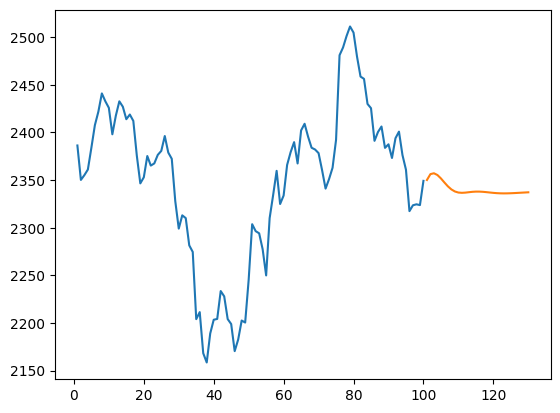

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1234:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

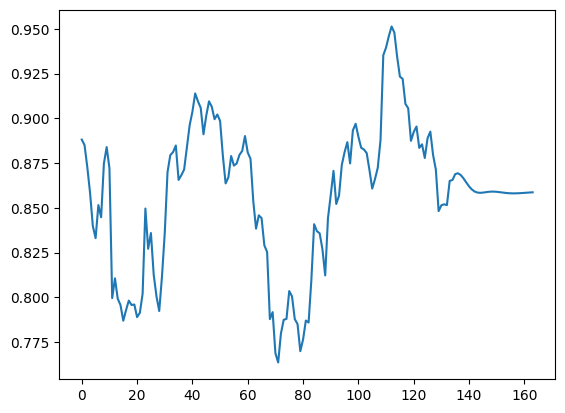

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()


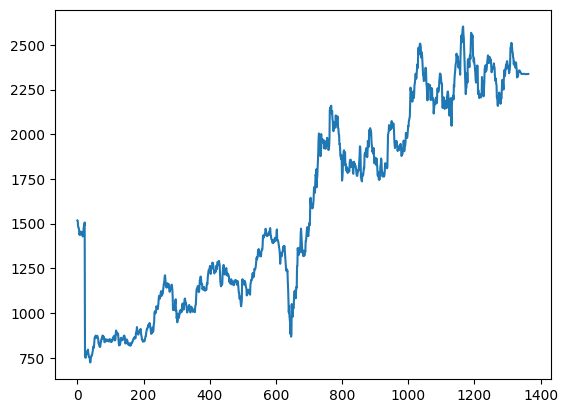

In [51]:
plt.plot(df3)


In [63]:
df1=scaler.inverse_transform(df1).tolist()


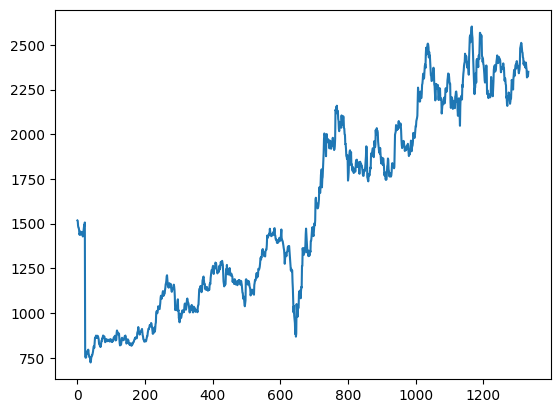

In [64]:
plt.plot(df1)


In [66]:
df.shape

(1334, 9)

In [67]:
df.head()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
3100,2017-08-03,1485.8485,1517.8463,1473.9975,1505.5851,727.1667,769629,0.0,1.0
3101,2017-08-04,1513.7897,1516.2055,1472.7668,1479.1025,714.3762,574520,0.0,1.0
3102,2017-08-07,1485.5750,1487.7630,1470.2598,1473.7239,711.7785,409385,0.0,1.0
3103,2017-08-08,1476.8235,1477.7352,1447.8795,1461.6906,705.9666,418121,0.0,1.0
3104,2017-08-09,1458.5911,1476.7323,1445.6006,1457.5427,703.9633,390796,0.0,1.0


In [88]:
df.tail(31)

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
4403,2022-11-18,2375.6810,2378.2791,2344.6859,2367.9778,2359.6421,138143,0.0,1.0
4404,2022-11-21,2356.5370,2360.4569,2318.2489,2324.6759,2316.4926,104254,0.0,1.0
4405,2022-11-22,2319.3885,2341.0394,2312.6881,2337.6664,2329.4375,201826,0.0,1.0
4406,2022-11-23,2351.0673,2351.0673,2326.5903,2330.5102,2322.3065,188170,0.0,1.0
4407,2022-11-24,2339.2162,2362.9183,2323.1261,2354.3035,2346.0160,101023,0.0,1.0
4408,2022-11-25,2354.7593,2392.2269,2353.2096,2385.7544,2377.3561,228490,0.0,1.0
4409,2022-11-28,2371.4420,2481.0642,2356.5370,2468.7118,2460.0215,358911,0.0,1.0
4410,2022-11-29,2465.1109,2489.1776,2455.3565,2471.4466,2462.7467,225659,0.0,1.0
4411,2022-11-30,2475.0475,2501.1199,2460.5528,2490.9097,2482.1413,116521,0.0,1.0
4412,2022-12-01,2494.1915,2511.2388,2475.9592,2482.2949,2473.5568,245387,0.0,1.0


In [86]:
from datetime import datetime

# Example dates (replace these with your actual dates)
date_str1 = "2022-11-20"
date_str2 = input("Enter a date (YYYY-MM-DD): ")

# Parse the input dates as datetime objects
date1 = datetime.strptime(date_str1, "%Y-%m-%d")
date2 = datetime.strptime(date_str2, "%Y-%m-%d")

# Calculate the difference between the two dates
difference = date2 - date1

# Extract the number of days from the difference
difference_in_days = difference.days

if difference_in_days < 0 or difference_in_days >= len(lst_output):
    print("Error: Input date is outside the range of available predictions.")
else:
    # Extract the corresponding prediction from the array
    predicted_value = scaler.inverse_transform(lst_output)[difference_in_days]
    print("Predicted Closing Price for", input_date, ":", predicted_value)

Enter a date (YYYY-MM-DD): 2022-11-23
Predicted Closing Price for 2022-11-23 : [2355.2940755]


In [90]:
# Save the scaler parameters
np.savez("scaler_parameters.npz", min_=scaler.min_, scale_=scaler.scale_)

In [91]:
import numpy as np

# Load the scaler parameters
data = np.load("scaler_parameters.npz")

# Extract the scaler parameters
min_ = data['min_']
scale_ = data['scale_']

print("Minimum value:", min_)
print("Scale value:", scale_)


Minimum value: [-0.38491372]
Scale value: [0.00053211]
